In [1]:
import os
import re
import platform

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
plt.style.use('ggplot')

from datetime import datetime
from tqdm import tqdm
from collections import Counter
import swifter
from konlpy.tag import Kkma, Komoran, Okt, Mecab
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [2]:
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
def Fontmanager():

    plt.rcParams['axes.unicode_minus'] = False

    if platform.system() == 'Windows':
        path = "c:/Windows/Fonts/malgun.ttf"
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    elif platform.system() == 'Darwin':
        path = '/Library/Fonts/Arial Unicode.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family='AppleGothic')
    elif platform.system() == 'Linux':
        path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family='NanumBarunGothic')
    else:
        print('Unknown system... sorry~~~~~~')
    print(f"해당 pc의 운영 체제는 {platform.system()}이며 {font_name}로 설정되었습니다")  
    return path

In [4]:
path = Fontmanager()

해당 pc의 운영 체제는 Darwin이며 Arial Unicode MS로 설정되었습니다


In [80]:
women_policy = pd.read_csv('dataset/women_policy_sm_best.csv')
minister = pd.read_csv('dataset/minister_sm_best.csv')
repeal = pd.read_csv('dataset/repeal_sm_best.csv')

In [50]:
# 혹시 모를 중복제거
women_policy = women_policy.drop_duplicates()
minister = minister.drop_duplicates()
repeal = repeal.drop_duplicates()

In [51]:
# 혹시 모를 nan값 확인
women_policy.isna().sum()

datetime       0
id             0
text           0
username       0
tokenized      0
label          0
score          0
label_word     0
text_re        0
multi_label    0
여성/가족          0
남성             0
성소수자           0
인종/국적          0
연령             0
지역             0
종교             0
기타 혐오          0
악플/욕설          0
clean          0
dtype: int64

In [52]:
minister.isna().sum()

datetime       0
id             0
text           0
username       0
text_re        0
multi_label    0
label          0
score          0
label_word     0
여성/가족          0
남성             0
성소수자           0
인종/국적          0
연령             0
지역             0
종교             0
기타 혐오          0
악플/욕설          0
clean          0
dtype: int64

In [75]:
repeal.isna().sum()

datetime       0
id             0
text           0
username       0
text_re        0
multi_label    0
label          0
score          0
label_word     0
여성/가족          0
남성             0
성소수자           0
인종/국적          0
연령             0
지역             0
종교             0
기타 혐오          0
악플/욕설          0
clean          0
dtype: int64

In [54]:
repeal = repeal.dropna()

In [55]:
repeal = repeal[repeal['username'] != 'miganHeart']

In [56]:
repeal = repeal[~repeal['text'].str.contains('#자격증')]
repeal = repeal[~repeal['text'].str.contains('#PIA사설탐정')]

In [57]:
repeal = repeal[repeal['username'] != 'OhmyNews_Korea']

In [58]:
minister = minister[minister['username'] != 'OhmyNews_Korea']

In [59]:
women_policy = women_policy[women_policy['username'] != 'OhmyNews_Korea']

## hashtag

In [16]:
def hashtag_preprocessing(df,column):
    texts = df[column.apply(lambda x : x.startswith('#'))]
    texts['text'] = texts['text'].str.split('\n').apply(lambda x : [i for i in x if i.startswith('#') ])
    texts['text'] = texts['text'].apply(lambda x: ' '.join(x))
    texts['text'] = texts['text'].str.split(' ').apply(lambda x : [i for i in x if i.startswith('#') ])
    word_of_Bag = sum(texts['text'], [])
    word_of_Bag = [word for word in word_of_Bag if not (len(word) == 1)]
    return word_of_Bag

In [17]:
def hashtag_count(word_of_bag):
    set_wob = set(word_of_bag)
    list_wob = list(set_wob)
    key = list_wob
    value = [word_of_bag.count(i) for i in list_wob]
    df = pd.DataFrame({'key':key, 'value':value})
    df = df[df['value'] != 1]
    return df

In [ ]:
# def hashtag_graph(df):
#     plt.figure(figsize=(20, 10))
#     plot = sns.barplot(df['key'], df['value'])
#     plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
#     plt.title('most common hashtag', fontsize=20)
#     plt.legend(fontsize=15)

In [18]:
word_of_Bag_w = hashtag_preprocessing(women_policy, women_policy['text_re'])
word_of_Bag_w_df = hashtag_count(word_of_Bag_w)

<ipython-input-16-ac30ba2be3ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts['text'] = texts['text'].str.split('\n').apply(lambda x : [i for i in x if i.startswith('#') ])
<ipython-input-16-ac30ba2be3ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts['text'] = texts['text'].apply(lambda x: ' '.join(x))
<ipython-input-16-ac30ba2be3ba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [19]:
word_of_Bag_m = hashtag_preprocessing(minister, minister['text_re'])
word_of_Bag_m_df = hashtag_count(word_of_Bag_m)

<ipython-input-16-ac30ba2be3ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts['text'] = texts['text'].str.split('\n').apply(lambda x : [i for i in x if i.startswith('#') ])
<ipython-input-16-ac30ba2be3ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts['text'] = texts['text'].apply(lambda x: ' '.join(x))
<ipython-input-16-ac30ba2be3ba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [20]:
word_of_Bag_r = hashtag_preprocessing(repeal, repeal['text_re'])
word_of_Bag_r_df = hashtag_count(word_of_Bag_r)

<ipython-input-16-ac30ba2be3ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts['text'] = texts['text'].str.split('\n').apply(lambda x : [i for i in x if i.startswith('#') ])
<ipython-input-16-ac30ba2be3ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts['text'] = texts['text'].apply(lambda x: ' '.join(x))
<ipython-input-16-ac30ba2be3ba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [ ]:
# women policy hashtag graph
plt.figure(figsize=(20, 10))
plot = sns.barplot(word_of_Bag_w_df['key'], word_of_Bag_w_df['value'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('most common hashtag', fontsize=20)
plt.legend(fontsize=15)
# save_fig('women policy hashtag graph')

In [ ]:
# minister hashtag graph
plt.figure(figsize=(20, 10))
plot = sns.barplot(word_of_Bag_m_df['key'], word_of_Bag_m_df['value'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('most common hashtag', fontsize=20)
plt.legend(fontsize=15)
# save_fig('minister hashtag graph')

In [ ]:
# repeal hashtag graph
plt.figure(figsize=(20, 10))
plot = sns.barplot(word_of_Bag_r_df['key'], word_of_Bag_r_df['value'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('most common hashtag', fontsize=20)
plt.legend(fontsize=15)
# save_fig('repeal hashtag graph')

### 전처리

In [ ]:
# 정규표현식 이용한 전처리
def clean(text):
    #\n 공백 제거
    text = re.sub('\n',' ',str(text))
    # &gt; &lt; &amp;
    text = re.sub('[&]+[a-z]+', '', str(text))
    # URL 제거
    text = re.sub('https://[A-Za-z0-9./]*','',str(text))
    # 한글자 제거 (ex:ㅋㅋ, ㅜㅜ)
    text = re.sub('([ㄱ-ㅎㅏ-ㅣ])+', '', str(text))
    # 숫자 제거 (숫자 + 숫자만 제거, ex: 1인가족)
    text= re.sub('[0-9]{2}', '', str(text))
    # @알파벳 제거 
    text = re.sub('@[A-Za-z0-9./]*','',str(text))
#     # 숫자 문자외 제거
#     text = re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣]', ' ', text)
    return str(text)

## who did tweet the most

In [ ]:
women_policy['text'] = women_policy['text'].apply(lambda x : clean(x))
minister['text'] = minister['text'].apply(lambda x : clean(x))
repeal['text'] = repeal['text'].apply(lambda x : clean(x))

In [ ]:
# women_policy
plt.figure(figsize=(20,10))
sns.barplot(x=women_policy['username'].value_counts()[:20].values, 
            y=women_policy['username'].value_counts()[:20].index,
           orient='h')
plt.title('Top 20 who the most writes', fontsize=20)
plt.axvline(x=np.average(women_policy['username'].value_counts().values), color='b', linestyle='--', linewidth=3, 
            label='avg')
plt.legend(fontsize=15)
save_fig('who did tweet the most w')

In [ ]:
# minister
plt.figure(figsize=(20,10))
sns.barplot(x=minister['username'].value_counts()[:20].values, 
            y=minister['username'].value_counts()[:20].index,
           orient='h')
plt.title('Top 20 who the most writes', fontsize=20)
plt.axvline(x=np.average(minister['username'].value_counts().values), color='b', linestyle='--', linewidth=3, 
            label='avg')
plt.legend(fontsize=15)
save_fig('who did tweet the most m')

In [ ]:
# minister
plt.figure(figsize=(20,10))
sns.barplot(x=repeal['username'].value_counts()[:20].values, 
            y=repeal['username'].value_counts()[:20].index,
           orient='h')
plt.title('Top 20 who the most writes', fontsize=20)
plt.axvline(x=np.average(repeal['username'].value_counts().values), color='b', linestyle='--', linewidth=3, 
            label='avg')
plt.legend(fontsize=15)
save_fig('who did tweet the most r')

## the lengths of the sentences

In [ ]:
# women_policy
plt.figure(figsize=(20,10))
sns.distplot(a=women_policy['text'].str.len(), bins=70, kde=True,
             kde_kws={"color":"g", "alpha":0.2, "linewidth":1, "shade":True})
plt.title('text length distribution', fontsize=20)
plt.axvline(x=np.average(women_policy['text'].str.len()), color='b', linestyle='--', linewidth=3, 
            label='avg')
plt.legend(fontsize=15)
save_fig('the lengths of the sentences w')

In [ ]:
# minister
plt.figure(figsize=(20,10))
sns.distplot(a=minister['text'].str.len(), bins=70, kde=True,
             kde_kws={"color":"g", "alpha":0.2, "linewidth":1, "shade":True})
plt.title('text length distribution', fontsize=20)
plt.axvline(x=np.average(minister['text'].str.len()), color='b', linestyle='--', linewidth=3, 
            label='avg')
plt.legend(fontsize=15)
save_fig('the lengths of the sentences m')

In [ ]:
# repeal
plt.figure(figsize=(20,10))
sns.distplot(a=repeal['text'].str.len(), bins=70, kde=True,
             kde_kws={"color":"g", "alpha":0.2, "linewidth":1, "shade":True})
plt.title('text length distribution', fontsize=20)
plt.axvline(x=np.average(repeal['text'].str.len()), color='b', linestyle='--', linewidth=3, 
            label='avg')
plt.legend(fontsize=15)
save_fig('the lengths of the sentences r')

### Tokenizing

In [ ]:
# tokenizer
# kkma = Kkma()
# komoran = Komoran()
# okt = Okt()
mecab = Mecab()

# stopwords list
stop_words = pd.read_csv('dataset/한국어불용어100.txt', sep = "\t", engine='python')
stop_words = list(stop_words["word"])

def preprocessing_mecab(sentence):
    #### Tokenize
    morphs = mecab.pos(sentence)
    
    JOSA = ["JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC"] # 조사
    SIGN = ["SF", "SE", "SSO", "SSC", "SC", "SY"] # 문장 부호
    TERMINATION = ["EP", "EF", "EC", "ETN", "ETM"] # 어미
    SUPPORT_VERB = ["VX"] # 보조 용언
    NUMBER = ["SN"]
    
    # Remove JOSA, EOMI, etc
    morphs[:] = (morph for morph in morphs if morph[1] not in JOSA+SIGN+TERMINATION+SUPPORT_VERB)
        
    # Remove length-1 words  
    morphs[:] = (morph for morph in morphs if not (len(morph[0]) == 1))
    
    # Remove Numbers
    morphs[:] = (morph for morph in morphs if morph[1] not in NUMBER)
   
    # Result pop-up
    result = []
    for morph in morphs:
        result.append(morph[0])
        
    return result

In [ ]:
women_policy['tokenized'] = women_policy['text'].apply(lambda x: preprocessing_mecab(x))
women_policy['tokenized'] = women_policy['tokenized'].apply(lambda x: [item for item in x if item not in stop_words])

minister['tokenized'] = minister['text'].apply(lambda x: preprocessing_mecab(x))
minister['tokenized'] = minister['tokenized'].apply(lambda x: [item for item in x if item not in stop_words])

In [ ]:
repeal['tokenized'] = repeal['text'].apply(lambda x: preprocessing_mecab(x))
repeal['tokenized'] = repeal['tokenized'].apply(lambda x: [item for item in x if item not in stop_words])

## wordcloud

In [ ]:
def common_words(words, k):
    c = Counter(words)
    cw = c.most_common(k)
    return c, cw

def wordcloud(c):
    wc = WordCloud(font_path='Arial Unicode', width=1000, height=1000, background_color ='white', scale=2.0, max_font_size=250)
    gen = wc.generate_from_frequencies(c)
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(gen)
    plt.axis("off")
    plt.tight_layout(pad=0)
    # save_fig("most_common_words_wordcloud")
    
def cw_table(cw):
    df = pd.DataFrame(cw, columns=['keywords', 'count'])
    return df

In [ ]:
# women_policy
words_sum = sum(women_policy['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
save_fig('wordcloud w')

In [ ]:
# minister
words_sum = sum(minister['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
save_fig('wordcloud m')

In [ ]:
# repeal
words_sum = sum(repeal['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
save_fig('wordcloud r')

In [ ]:
women_policy_w = women_policy.copy()
minister_m = minister.copy()
repeal_r = repeal.copy()

In [ ]:
# women_policy without 여성, 정책
stop_words_w = ['여성', '정책']
women_policy_w['tokenized'] = women_policy_w['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_w])

words_sum = sum(women_policy_w['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
save_fig('wordcloud without w')

In [ ]:
# minister without 여가부, 폐지
# 여가가 여가부 같으니
stop_words_m = ['여가부', '폐지', '여가']
minister_m['tokenized'] = minister_m['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_m])

words_sum = sum(minister_m['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
save_fig('wordcloud without m')

In [ ]:
# repeal without 폐지
# 여가가 여가부 같으니
stop_words_r = ['폐지']
repeal_r['tokenized'] = repeal_r['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_r])

words_sum = sum(repeal_r['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
save_fig('wordcloud without r')

In [ ]:
# women_policy
# '이재명' 포함한 문장
stop_words_lee=['이재명']
lee = women_policy_w[women_policy_w['text'].str.contains('이재명')]

lee['tokenized'] = lee['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_lee])

# wordcloud
words_sum = sum(lee['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
# save_fig('wordcloud lee')

## the most common words by date

In [ ]:
women_policy_w['date'] = pd.to_datetime(women_policy_w['datetime']).apply(lambda x: x.date())
women_policy_w['date_re'] = women_policy_w['date'].apply(lambda x : x.strftime('%Y-%m-%d'))

date = []
word_list = []
count_list = []
# tokenizing_list = []

for i in women_policy_w['date_re'].unique():
    tokenizing = sum(women_policy_w[women_policy_w['date_re'] == i]['tokenized'],[])
    c, cw = common_words(tokenizing, 1)    
    word = cw[0][0]
    count = cw[0][1]
    date.append(i)
    word_list.append(word)
    count_list.append(count)
    
dateworddict = {'date' : date, 'word' : word_list, 'count' : count_list}
test_df = pd.DataFrame(dateworddict, columns=['date', 'word', 'count'])

In [ ]:
def add_value_labels(ax, word, spacing=5):
    for idx, rect in enumerate(ax.patches):
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'

        label = "{0}".format(word[idx])

        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)  

In [ ]:
# women policy
fig, ax = plt.subplots(1, figsize=(20,10))
plot = sns.barplot(test_df['date'], test_df['count'])
add_value_labels(ax, test_df['word'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('most common word by date', fontsize=20)
plt.legend(fontsize=15)
save_fig("most common word by date w")

fig, ax = plt.subplots(1, figsize=(20,10))
plot = sns.barplot(women_policy_w.groupby('date').count()['date_re'].index,
                   women_policy_w.groupby('date').count()['date_re'].values)
add_value_labels(ax, women_policy_w.groupby('date').count()['date_re'].values)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('distribution by date', fontsize=20)
plt.legend(fontsize=15)
save_fig("distribution by date w")

In [ ]:
# minister
minister_m['date'] = pd.to_datetime(minister_m['datetime']).apply(lambda x: x.date())
minister_m['date_re'] = minister_m['date'].apply(lambda x : x.strftime('%Y-%m-%d'))

date = []
word_list = []
count_list = []
# tokenizing_list = []

for i in minister_m['date_re'].unique():
    tokenizing = sum(minister_m[minister_m['date_re'] == i]['tokenized'],[])
    c, cw = common_words(tokenizing, 1)    
    word = cw[0][0]
    count = cw[0][1]
    date.append(i)
    word_list.append(word)
    count_list.append(count)
    
dateworddict = {'date' : date, 'word' : word_list, 'count' : count_list}
test_df = pd.DataFrame(dateworddict, columns=['date', 'word', 'count'])

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,10))
plot = sns.barplot(test_df['date'], test_df['count'])
add_value_labels(ax, test_df['word'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('most common word by date', fontsize=20)
plt.legend(fontsize=15)
save_fig("most common word by date m")

fig, ax = plt.subplots(1, figsize=(20,10))
plot = sns.barplot(minister_m.groupby('date').count()['date_re'].index,
                   minister_m.groupby('date').count()['date_re'].values)
add_value_labels(ax, minister_m.groupby('date').count()['date_re'].values)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('distribution by date', fontsize=20)
plt.legend(fontsize=15)
save_fig("distribution by date m")

In [ ]:
# #국민의힘과_이준석은_사죄하라 해시 태그 운동

In [ ]:
# repeal
repeal_r['date'] = pd.to_datetime(repeal_r['datetime']).apply(lambda x: x.date())
repeal_r['date_re'] = repeal_r['date'].apply(lambda x : x.strftime('%Y-%m-%d'))

date = []
word_list = []
count_list = []
# tokenizing_list = []

for i in repeal_r['date_re'].unique():
    tokenizing = sum(repeal_r[repeal_r['date_re'] == i]['tokenized'],[])
    c, cw = common_words(tokenizing, 1)    
    word = cw[0][0]
    count = cw[0][1]
    date.append(i)
    word_list.append(word)
    count_list.append(count)
    
dateworddict = {'date' : date, 'word' : word_list, 'count' : count_list}
test_df = pd.DataFrame(dateworddict, columns=['date', 'word', 'count'])

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,10))
plot = sns.barplot(test_df['date'], test_df['count'])
add_value_labels(ax, test_df['word'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('most common word by date', fontsize=20)
plt.legend(fontsize=15)
save_fig("most common word by date r")

fig, ax = plt.subplots(1, figsize=(20,10))
plot = sns.barplot(repeal_r.groupby('date').count()['date_re'].index,
                   repeal_r.groupby('date').count()['date_re'].values)
add_value_labels(ax, repeal_r.groupby('date').count()['date_re'].values)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('distribution by date', fontsize=20)
plt.legend(fontsize=15)
save_fig("distribution by date r")

## multi label distribution

No handles with labels found to put in legend.


그림 저장: multi label distribution w


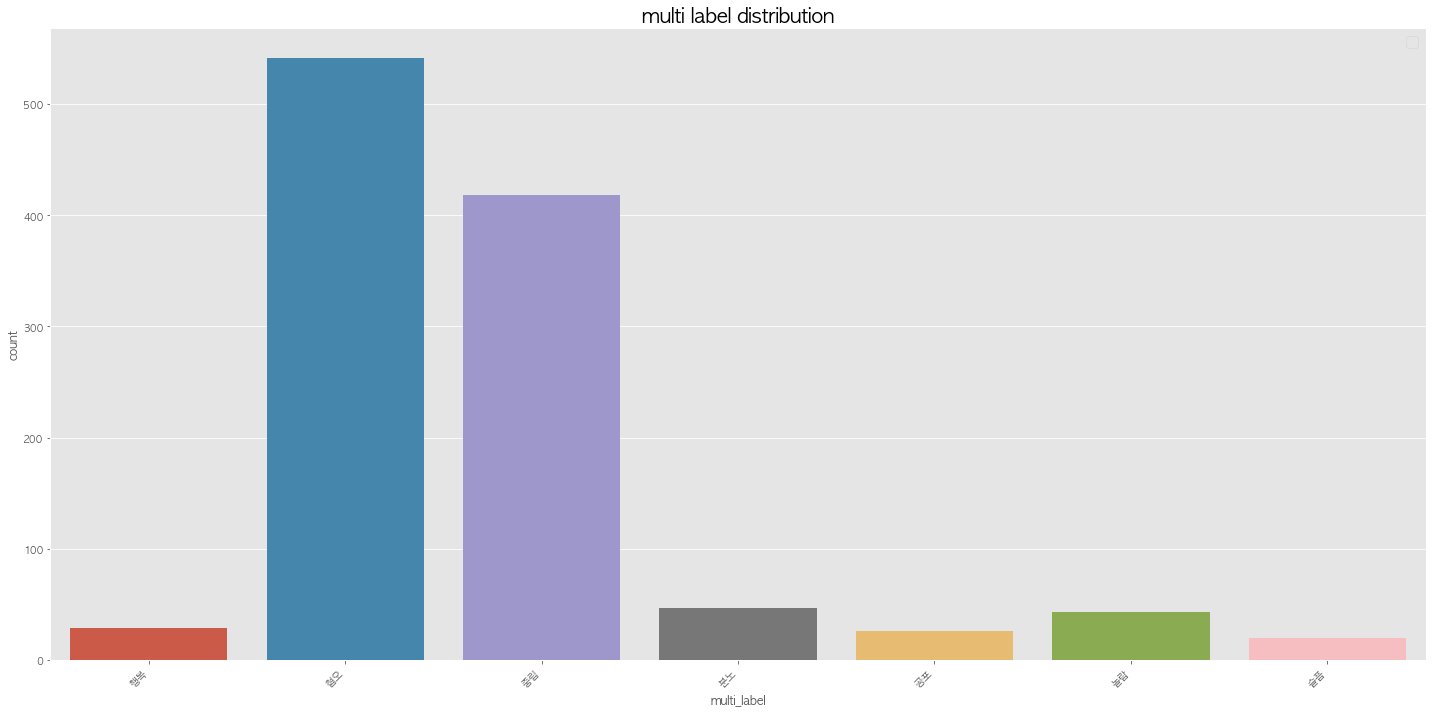

In [60]:
# women_policy
plt.figure(figsize=(20,10))
plot = sns.countplot(women_policy['multi_label'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('multi label distribution', fontsize=20)
plt.legend(fontsize=15)
# save_fig('multi label distribution w')

No handles with labels found to put in legend.


그림 저장: multi label distribution m


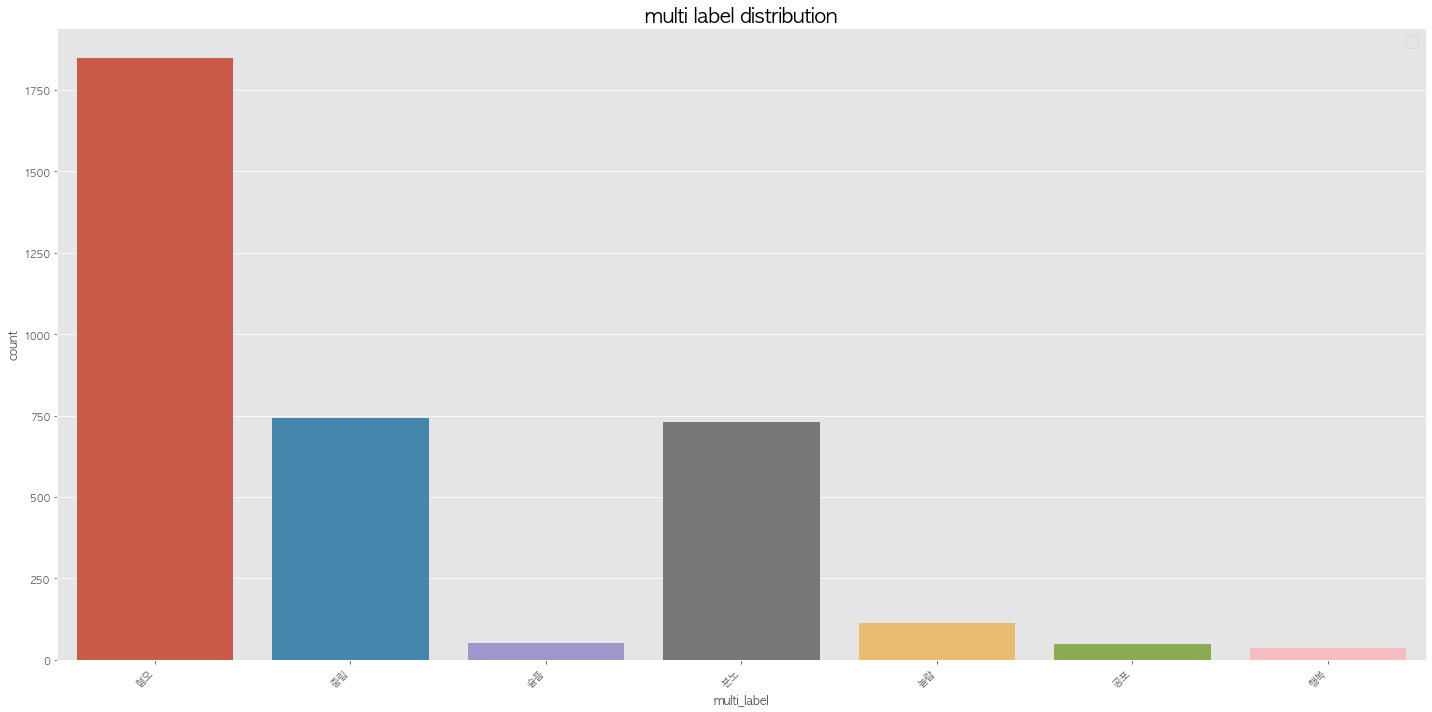

In [22]:
# minister
plt.figure(figsize=(20,10))
plot = sns.countplot(minister['multi_label'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('multi label distribution', fontsize=20)
plt.legend(fontsize=15)
save_fig('multi label distribution m')

No handles with labels found to put in legend.


그림 저장: multi label distribution r


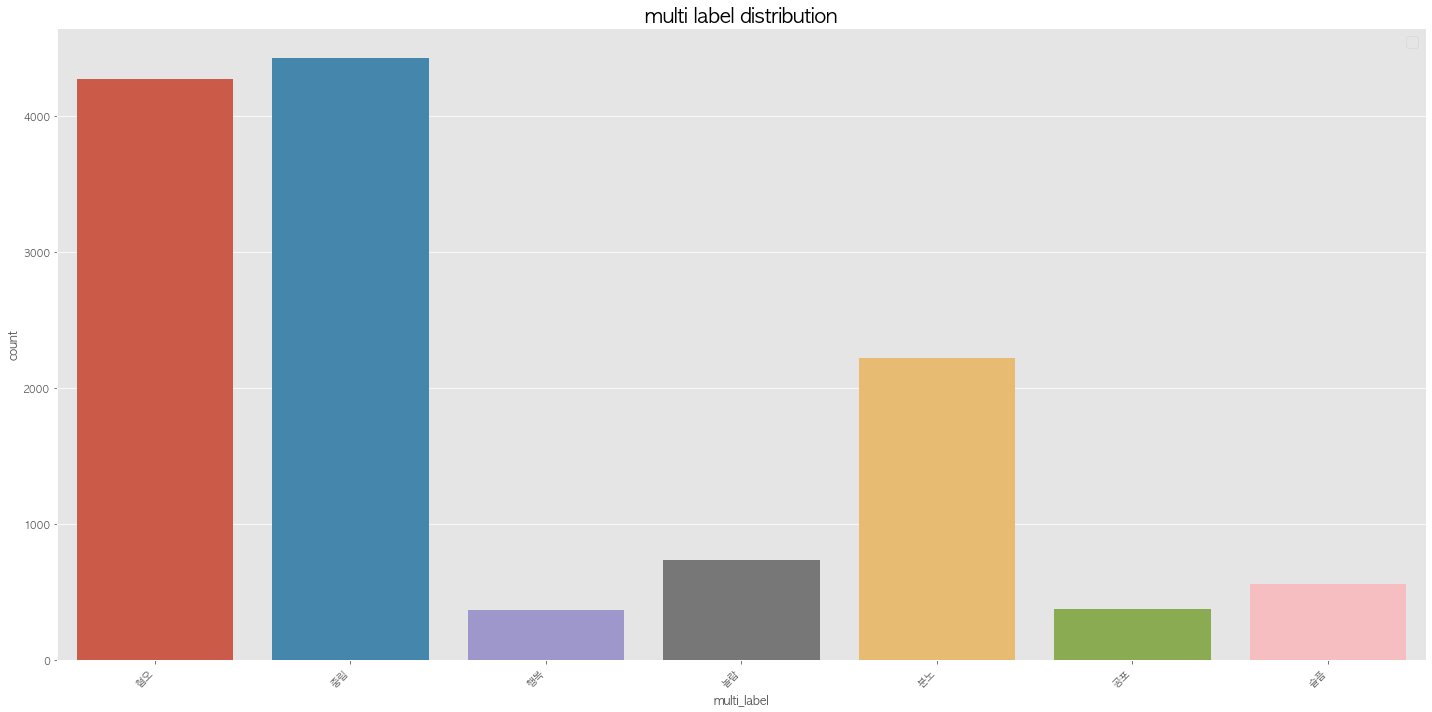

In [23]:
# repeal
plt.figure(figsize=(20,10))
plot = sns.countplot(repeal['multi_label'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('multi label distribution', fontsize=20)
plt.legend(fontsize=15)
# save_fig('multi label distribution r')

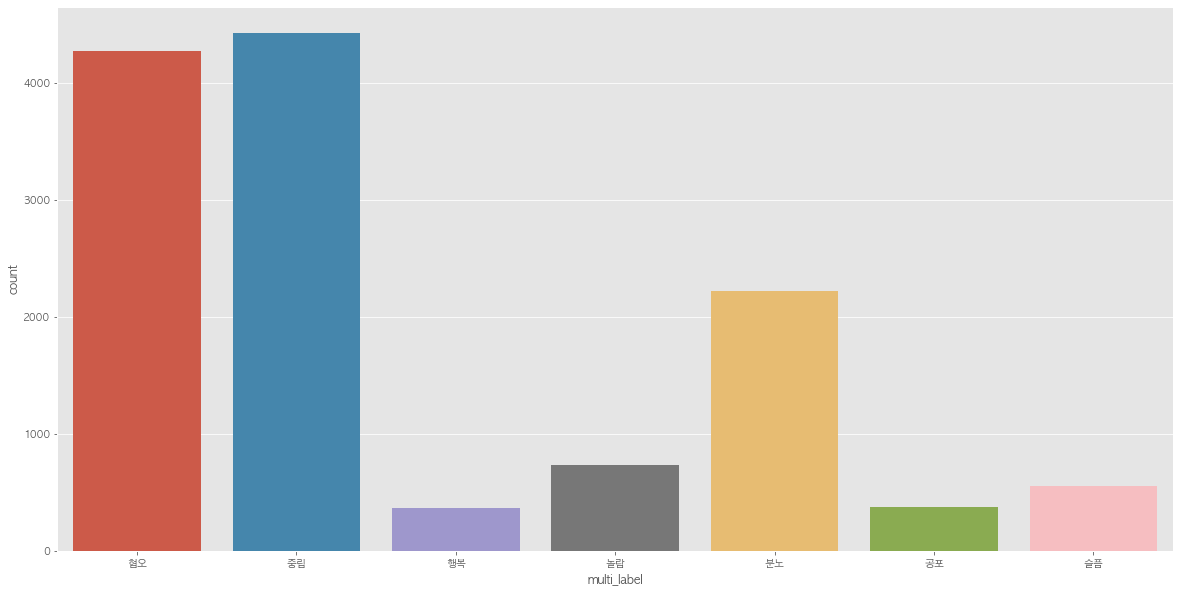

그림 저장: multi label distribution r


<Figure size 432x288 with 0 Axes>

In [24]:
# repeal
plt.figure(figsize=(20,10))
sns.countplot(repeal['multi_label'])
plt.show()
# save_fig('multi label distribution r')

In [ ]:
women_policy['multi_label'].unique()

In [ ]:
wp_hp = women_policy[women_policy['multi_label'] == '행복']
wp_hate = women_policy[women_policy['multi_label'] == '혐오']
wp_n = women_policy[women_policy['multi_label'] == '중립']
wp_f = women_policy[women_policy['multi_label'] == '분노']
wp_sc = women_policy[women_policy['multi_label'] == '공포']
wp_sur = women_policy[women_policy['multi_label'] == '놀람']
wp_sad = women_policy[women_policy['multi_label'] == '슬픔']

In [ ]:
stop_words_w = ['여성', '정책']
wp_sad['tokenized'] = wp_sad['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_w])

words_sum = sum(wp_sad['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
save_fig('wordcloud without wp_sad')

## pos neg label distribution

No handles with labels found to put in legend.


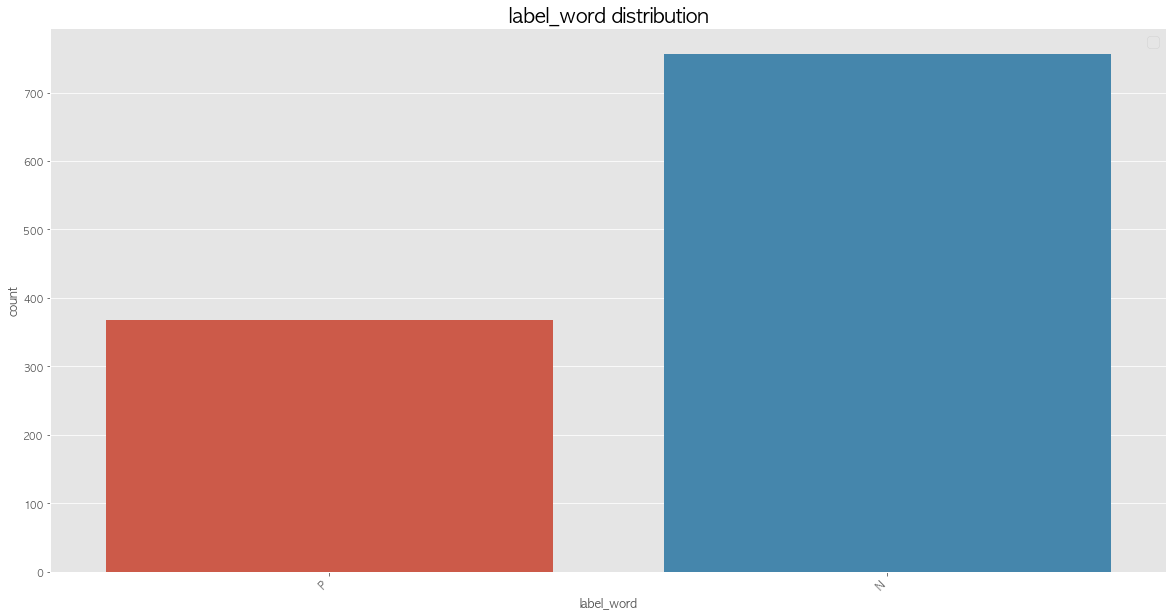

In [61]:
# women_policy
plt.figure(figsize=(20,10))
plot = sns.countplot(women_policy['label_word'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('label_word distribution', fontsize=20)
plt.legend(fontsize=15)
# save_fig('pog neg label distribution w')

No handles with labels found to put in legend.


그림 저장: pog neg label distribution m


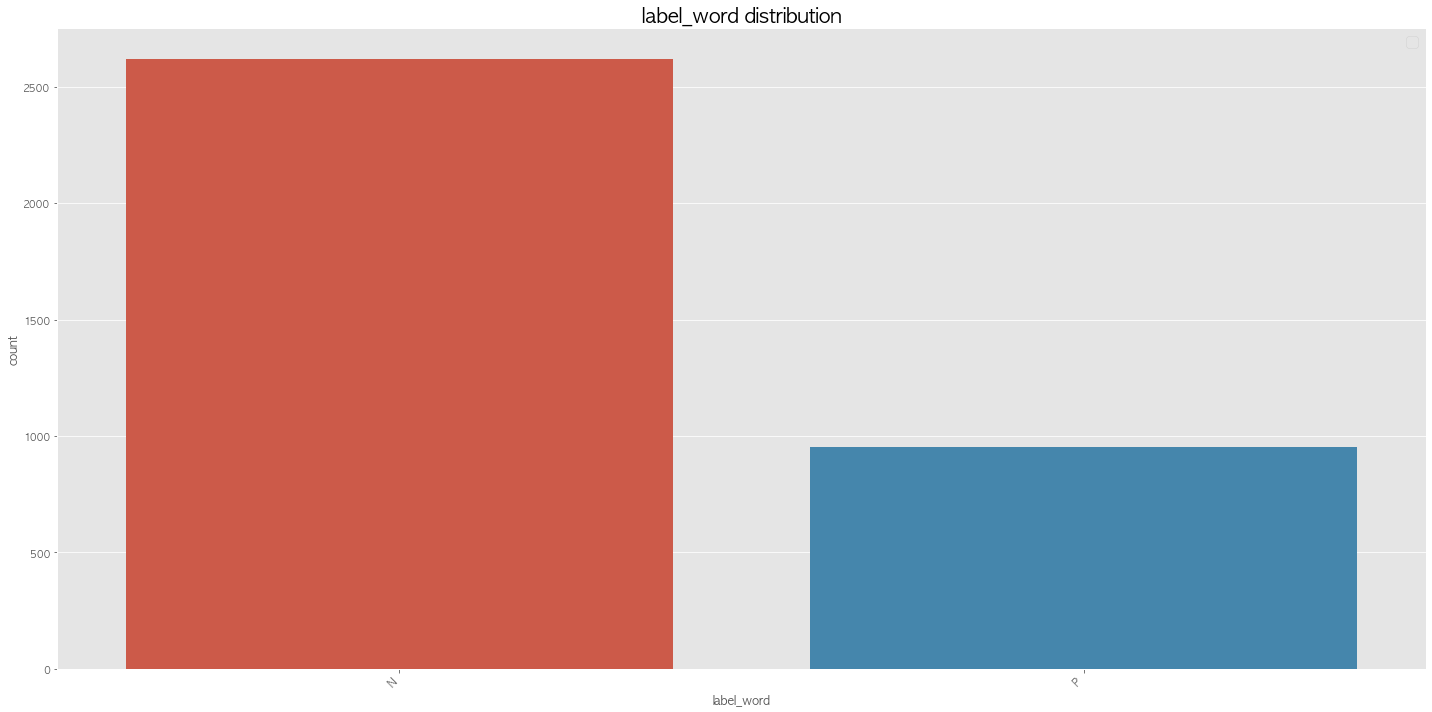

In [62]:
# minister
plt.figure(figsize=(20,10))
plot = sns.countplot(minister['label_word'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('label_word distribution', fontsize=20)
plt.legend(fontsize=15)
# save_fig('pog neg label distribution m')

No handles with labels found to put in legend.


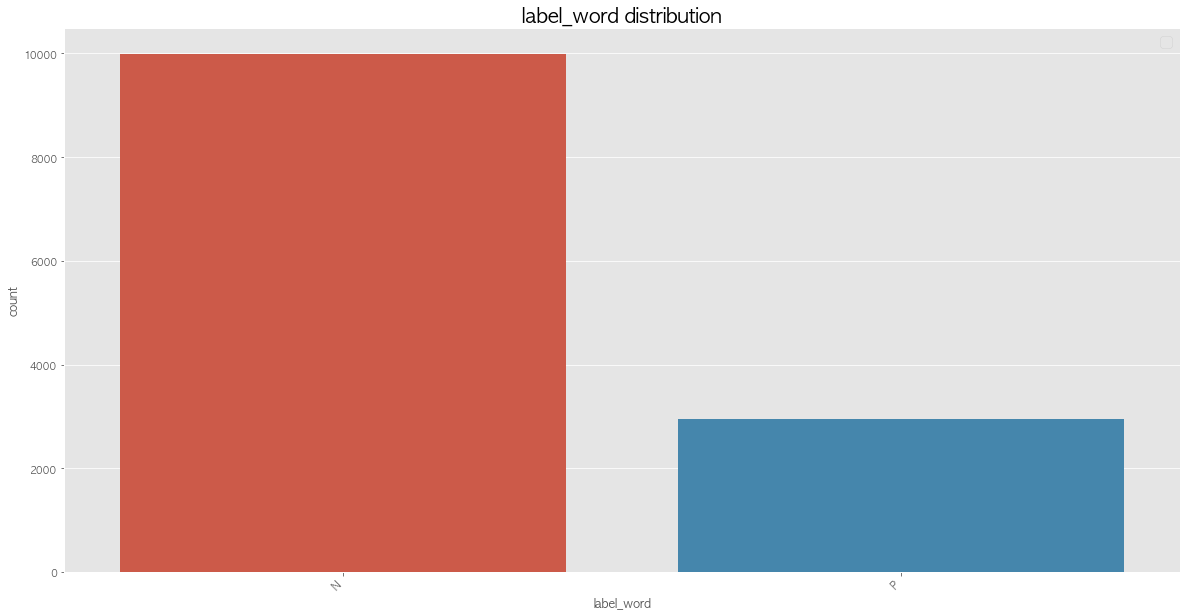

In [63]:
# repeal
plt.figure(figsize=(20,10))
plot = sns.countplot(repeal['label_word'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('label_word distribution', fontsize=20)
plt.legend(fontsize=15)
# save_fig('pog neg label distribution r')

In [ ]:
# sunburst 그래프
# word2vec
# network